Homework 3 — (20 points)
======
### What to hand in
You are to submit the following things for this homework:
1. A Jupyter notebook containing all code and output (figures and audio). I should be able to evaluate the file to reproduce all output. 
1. Any other data that we tell you to save to a file (e.g. audio files).

Note: Make sure to include all the files that are required for the notebook to run **from the submission folder** (e.g. police_noisy.wav). Points will be taken off from submissions that crash because Python cannot find the specified files.

### How to hand it in
To submit your lab:
1. Compress all of the files specified into a .zip file. 
1. Name the file in the following manner, firstname_lastname_hw1.zip. For example, Bryan_Pardo_hw3.zip. 
1. Submit this .zip file via Canvas

# *Please write down your name here* =>

### Run this code block 1st, to import the needed packages

In [50]:
# This line is a convenience to import most packages you'll need. You may need to import others (e.g. random and cmath)
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa, cmath,math, csv
from IPython.display import Audio
from sklearn.datasets import load_iris
# This line makes sure your plots happen IN the webpage you're building, instead of in separate windows.
%matplotlib inline

## IMPLEMENT DISTANCE MEASURES

#### 1. (1 point) Implement a distance measure that takes two numpy arrays and an a positive scalar as input  and returns a distance measure between these two numpy arrays based on a generalized P-norm (AKA L-norm)  (e.g. P = 1 means Manhattan distance, P = 2 is Euclidean). The only library you may use to write this function is numpy.

In [51]:
def p_norm_distance(x, y, p):
    """
    Takes a pair of numpy arrays, applies the appropriate p-norm distance measure to them and outputs it.
    
    Input Parameters
    ----------------
    x: a 1D numpy array of a feature vector
    y: a 1D numpy array of a feature vector
    p: integer, If 1, use Manhattan distance. If 2, use Euclidean distance
                
    Returns
    -------
    distance: a non-zero scalar, representing the distance between x and y
    """
    
    if p == 1:
        distance = np.linalg.norm(x - y, ord=1)
    elif p == 2:
        distance = np.linalg.norm(x - y, ord=2)
    
#     raise NotImplementedError # delete this line when you add your solution

    return distance


In [52]:
# x = np.array([1,2])
# y = np.array([3,4])
# p_norm_distance(x, y, 2)

In [53]:
# you can leave this cell blank - it's for the auto-grader

#### 2. (1 point) Create two sets of test cases that run your code from the previous question and illustrate it works correctly. The test cases include one for Manhatten distance and the other for euclidean distance. Compare your implementation with distance functions provided in the Scipy package:

* Manhattan diatance: [scipy.spatial.distance.cityblock](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.cityblock.html) 
* Euclidean distance: [scipy.spatial.distance.euclidean](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.euclidean.html)

In [54]:
# raise NotImplementedError # delete this line when you add your solution

x = np.array([1,2,3,4,5])
y = np.array([6,7,8,9,10])

print(p_norm_distance(x, y, 1) == sp.spatial.distance.cityblock(x,y))
print(p_norm_distance(x, y, 2) == sp.spatial.distance.euclidean(x,y))

True
True


#### 3. (1 point) Implement a distance measure that takes two vectors as input and returns the cosine distance between them.

In [55]:
def cosine_distance(x, y):
    """
    Takes a pair of numpy arrays, applies cosine distnace between them.
    
    Input Parameters
    ----------------
    x: a 1D numpy array of a feature vector
    y: a 1D numpy array of a feature vector
                
    Returns
    -------
    distance: the cosine distance between x and y
    """
    
    x_y_dot = np.dot(x, y)
    sqrt_sum_x = np.linalg.norm(x)
    sqrt_sum_y = np.linalg.norm(y)

    
    distance = x_y_dot / (sqrt_sum_x * sqrt_sum_y)
    distance = 1 - distance
    
#     raise NotImplementedError # delete this line when you add your solution
    
    return distance

In [56]:
# you can leave this cell blank - it's for the auto-grader

#### 4. (1 point) Create two sets of test cases that run your code from the previous question and illustrate it works correctly. Compare your implementation with distance functions provided in the Scipy package:

* Cosine diatance: [scipy.spatial.distance.cosine](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.cosine.html) 

In [57]:
# raise NotImplementedError # delete this line when you add your solution

x = np.array([1,2,3,4,5])
y = np.array([6,7,8,9,10])
z = np.array([21,324,6785,546,143])

print(sp.spatial.distance.cosine(x,y) == cosine_distance(x,y))
print(sp.spatial.distance.cosine(y,z) == cosine_distance(y,z))
print(sp.spatial.distance.cosine(x,x) == cosine_distance(x,x))


True
True
True


#### 5. (1 point) Describe an example situation where Cosine distance would be preferable to Euclidean distance. We want two parts to this: First, explain a fundamental property where Cosine distance differs from Euclidean. Second, give an example situation (relating to audio) where that property would be an advantage.

Part one: cosine similarity/distance only focuses on if two vectors are similar. It normalizes the vectors as an integral part of calculating the cosine distance. Eucledian distance does not offer any sort of helpful scaling or normalization. 

Part two: If there were two audio files of the same exact song, but one was much louder than the other, euclidean distance would fail. It would show a large difference/distance between these two files, because there is not any feature scaling done in finding eucledian distance. Cosine similarity offers an immunity to scaling differences like this, because it only cares that these two vectors are similar or "pointing in the same direction".

## IMPLEMENT A K-NEAREST NEIGHBOR CLASSIFIER

#### 6. (2 points) Implement a K-nearest-neighbor classifier that can use either Euclidean distance or Cosine distance. (Use the Scipy package for distance meatures)


In [260]:
def knn(data_X, data_Y, query_X, dist_measure, k):
    """
    Takes a data set of examples encoded as feature vectors, along with the label for each example in the data. 
    It also takes in a set of queries, for which we want to know the labels. It finds the distance from each 
    query_X to each example in data_X. It returns a label for each example in query_X by picking the most 
    popular label from the k nearest neighbors in data_X. Distance is determined by the selected distance metric.
    
    Input Parameters
    ----------------
    data_X: a 2-D numpy array with a shape of (the number of examples in the data, the number of features).
    data_Y: a 1-D numpy array containing integer labels for the examples in data_X. 
            The labels should be encoded as integer values BEFORE they are passed this function.
            (E.g., [class1, class1, class2, class1] ==> [0, 0, 1, 0])
    query_X: a 2-D numpy array with a shape of (the number of query examples, the number of features). 
            Note, the query_X must have the same number of features, in the same order as the data_X 
    dist_measure: a string determining which distance measure to use. ('euclidean' or 'cosine')
    k: the number of nearest neighbors in the data to consider, when labeling a query
    
    Returns
    ----------------
    query_Y: a 1-D numpy array of integer values referring to predicted labels for the set of queries
    """
    
    # nested for loop
    # for each query,
        # for each vector in train_x,
            # check query distance to each train_X vector and
            # store the distance between each query in a vector the same size as train_Y
        # in a vector the height of (#vecs in) query_X store the label that matches the index of the smallest number
    # return
    
    query_Y = []
    
    print('\nstart\n')
    
    for q_x in query_X: # check each query 
        k_smallest = np.array([])
        distances = np.array([])
        for t_x in data_X: # against each training datum
            if dist_measure == "euclidean":
                dist = sp.spatial.distance.euclidean(q_x, t_x)
                distances = np.append(distances, dist) # append the euclidean distance between query and datum
            elif dist_measure == "cosine":
                dist = sp.spatial.distance.cosine(q_x, t_x)
                distances = np.append(distances, dist) # append the cosine distance ""
        
        # grab smallest k
        for i in range(k):
            min_dist_ind = np.argmin(distances) # index of min distance
            k_smallest = np.append(k_smallest, min_dist_ind) # track indices
            distances[min_dist_ind] = np.argmax(distances) + 1 # reset so it is no longer min, but don't change sizing
        k_smallest = k_smallest.astype(int)
        for i in range(len(k_smallest)):
            k_smallest[i] = data_Y[k_smallest[i]] # go from index of label in data_Y to label in data_Y
        print("k_smallest", k_smallest)
        
#         print(np.bincount(k_smallest).argmax())
        query_Y.append(np.bincount(k_smallest).argmax())  # grab the most common label, append to label array
        
    return query_Y
    
#     raise NotImplementedError # delete this line when you add your solution

In [261]:
# you can leave this cell blank - it's for the auto-grader

#### 7. (1 point) Generate a toy test case that would make different classification choices, depending on which metric (Euclidean or Cosine) you choose.  Before running the actual code, in this problem, you are going to classify test data by eye-balling it.

1) Generate a training set of 10 data points with 2 features (i.e. 2-dimensional vectors) and 2 classes. The training set should include two numpy array: train_X of shape (10, 2) and train_Y of shape (10, ). train_Y contains 0 or 1 each of which indicates the first class and the second class.

2) Plot the training set on 2-D feature space with color coded classes, so we can tell which one belongs to which class.

3) Generate a test set of 3 data points with 2 features. The test set should include two numpy array: test_X of shape (3, 2). Plot them on the figure you created in the previous step. Use a color that was not used for the trainng set.

4) Make sure the figure has a proper legend so we can tell which data points are training data of class1 or class2, or testing data.

5) Perform KNN classification by eye-balling it (**K=3**). Tell the predicted class of each testing data point if you use Euclidean distance. 

6) Perform KNN classification AGAIN by eye-balling it (**K=3**). Tell the predicted class of each testing data point if you use Cosine distance. 

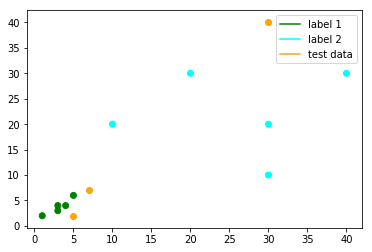

In [265]:
train_X = np.array([[1,2], [3,3], [3,4], [4,4], [5,6], [30,20], [10,20], [20,30], [40,30], [30,10]]) #replace it with your training data 
train_Y = np.array([0,0,0,0,0,1,1,1,1,1]) # replace it with labels of your training data

test_X = np.array([[7,7], [30,40], [5,2]]) # replace it with your testing data


# your code to generate the plot goes here

color_labels = ['green', 'cyan']

plt_train_x,plt_train_y = train_X.T
train_plt = plt.scatter(plt_train_x, plt_train_y, c=train_Y, cmap=matplotlib.colors.ListedColormap(color_labels))

plt_test_x, plt_test_y = test_X.T

test_plt = plt.scatter(plt_test_x, plt_test_y, color='orange')

legend_elems = [matplotlib.lines.Line2D([0], [0], color='green', label='label 1'),
                matplotlib.lines.Line2D([0], [0], color='cyan', label='label 2'),
                matplotlib.lines.Line2D([0], [0], color='orange', label='test data')]
plt.legend(handles=legend_elems)
plt.show()


# raise NotImplementedError # delete this line when you add your solution

In [266]:
# The predicted labels of the testing data, given Euclidean distance, goes here
test_Y_euclidean = np.array([0, 0, 1]) # replace these values with the right labels

# The predicted labels of the testing data, given Cosine distance, goes here
test_Y_cosine = np.array([0, 0, 0]) # replace these values with the right labels

# raise NotImplementedError # delete this line when you add your solution

#### 8. (1 point) Test your implementation of KNN (K=3) with the training and testing set you generated from question 7 and compare the predicted labels from your code with labels you predicted in question 7.

In [267]:
# knn(data_X, data_Y, query_X, dist_measure, k)
query_Y_eu = knn(train_X, train_Y, test_X, 'euclidean', 3)
query_Y_cos = knn(train_X, train_Y, test_X, 'cosine', 3)

print(query_Y_eu, query_Y_cos)


# raise NotImplementedError # delete this line when you add your solution


start

k_smallest [0 0 0]
k_smallest [1 1 1]
k_smallest [0 0 0]

start

k_smallest [0 0 0]
k_smallest [0 0 1]
k_smallest [1 1 1]
[0, 1, 0] [0, 0, 1]


#### 9. (1 point) Implement an evaluation function that takes a vector of true labels and a vector of predicted labels and outputs classification accuracy and a confusion matrix. 

In [268]:
def evaluation(pred, truth, n_classes):
    '''
    Takes a set of predicted labels and grount truth labels, and compute the classification accuracy. 
    Input Parameters
    ----------------
    pred: a 1-D numpy array of integer values which refer to labels predicted from a classifier.
    truth: a 1-D numpy array of integer values which refer to ground truth labels
    n_classes: a number of classes in your dataset.

    
    Returns
    -----------------
    accuracy: a float number indicating the classification accuracy as a number in the range 0 to 1.
    confusion: a n-D numpy array of confusion matrix with the shape of (n_classes, n_classes)

    '''
    
    raise NotImplementedError # delete this line when you add your solution

    return accuracy, confusion

In [269]:
# you don't need to put anything here, this cell is for the autograder

#### 10. (1 point) Now complete the *KNN_testing* function to test your KNN classifier on a real dataset. You can load the dataset by calling *load_dataset* provided below. It returns training set and testing set of two classes. Build a KNN classifier on the training set and evaulate it on the provided testing set using the functions you implemented in the previous question.

* *NOTE: When running KNN, set K=2 and use euclidean distance*

In [ ]:
def load_dataset():
    
    iris = load_iris()
    data_X = iris.data
    data_Y = iris.target
    data_X_class1 = data_X[data_Y==1, :]
    data_X_class2 = data_X[data_Y==2, :]
    train_X = np.vstack((data_X_class1[:30, :], data_X_class2[:30, :]))
    train_Y = np.array([0]*30+[1]*30)
    test_X = np.vstack((data_X_class1[30:, :], data_X_class2[30:, :]))
    test_Y = np.array([0]*20+[1]*20)

    return train_X, train_Y, test_X, test_Y

def KNN_testing():
    
    '''
    Returns
    -----------------
    accuracy: a float number indicating the classification accuracy as a number in the range 0 to 1.
    confusion: a 2-D numpy array of confusion matrix.
    '''
    
    # data loading
    train_X, train_Y, test_X, test_Y = load_dataset()
    
    raise NotImplementedError # delete this line when you add your solution
    
    return accuracy, confusion

In [ ]:
# you don't need to put anything here, this cell is for the autograder

# Audio classification

#### In the lecture, we have walked you through the procedure of door knock/phone rining classification. In the following questions, you are going to go through the same procedure, but with different dataset. In this homework, you are going to use ESC-50 [https://github.com/karoldvl/ESC-50] dataset. 

1. Open `./dataset/meta/esc50.csv` in the dataset. It contains a list of file names and their labels. While the csv files contains 2000 file names, you are going to use only two classes of audio events: *sneezing and snoring*. We included the audio files of *sneezing and snoring* in the homework (`./dataset/audio/`), so you do not need to download the dataset from the official website.

2. As shown in `./dataset/meta/esc50.csv`, there are 40 examples per class and the 40 examples are split into 5 folds. You are going to use folds 1-3 as a training set and 4-5 as a testing set. Since each fold contains 8 examples and you are using two classes, you will end up with 48 training examples (24 sneezings, 24 snorings) and 32 testing examples (16 sneezings, 16 snorings).

#### 11. (2 points) Implement a feature extraction function. It takes an audio file path, extract audio features, and outputs a single feature vector. 

* Extract [zero-crossing rate](https://librosa.github.io/librosa/generated/librosa.feature.zero_crossing_rate.html) and [spectral centroid](https://librosa.github.io/librosa/generated/librosa.feature.spectral_centroid.html) using librosa package (window length: 2048, hop size: 1024). 
* Do feature summarization to convert a series of feature vectors into a single feature vector. Use mean and delta-mean.

In [ ]:
def feature_extraction(file_path):
    '''
    Takes an audio file path, read the audio (keep the original sampling rate), 
    extract audio features from the audio, and outputs a single feature vector containing
    [mean-zero-crossing-rate, mean-delta-zero-crossing-rate, mean-spectral-centroid, mean-delta-spectral-centroid]
    
    Input Parameters
    ----------------
    file_path: a string indicating a path to an audio file.
    
    Returns
    ----------------
    feature_vector: a 1-D numpy array of an extracted feature vector.
    '''
    
    raise NotImplementedError # delete this line when you add your solution
    return feature_vector

In [ ]:
# you don't need to put anything here, this cell is for the autograder

#### 12. (1 point) Implement following two functions: 1) a function constructing feature vectors from all the training and testing data and encoding labels of them and 2) a function recaling the feature vectors.
   * To collect file names of all the data you need, you can use the provided function *collect_filenames*.
   * For feature extraction, use *feature_extraction* function you built from the previous question.
   * The labels should be encoded as an integer value: (Sneezing:0, snoring:1) 
   * Rescale each feature to a range (0, 1) using [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).  
   * The scaling factor should be learned from the **entire training set** including both sneezing and snoring class
   * The scaling factor should **NOT** be learned from the **testing set** because we should assume that your classifer never have access to testing data before it is tested. Therefore, you first learn scaling factor from trianing set only and apply the learned scaler to both training and testing data.

In [ ]:
def collect_filenames(path_to_esc50_csv):
    
    '''
    Collect file names for training and testing set from `./dataset/meta/esc50.csv`. 

    Input Parameters
    ----------------
    path_to_esc50_csv: a string indicating a path to esc50.csv in ESC50 dataset.
    
    
    Returns
    ----------------
    train_filenames: a dictionary containing file names of training set. 
                    Its keys are each class name: 'sneezing', 'snoring' 
    test_filenames: a dictionary containing file names of testing set. 
                    Its keys are each class name: 'sneezing', 'snoring' 
    '''
    train_filenames = {'sneezing':[], 'snoring':[]}
    test_filenames = {'sneezing':[], 'snoring':[]}
    
    with open(path_to_esc50_csv) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            if row['category'] == 'sneezing':
                if int(row['fold']) in [1, 2, 3]:
                    train_filenames['sneezing'].append(row['filename'])
                else:
                    test_filenames['sneezing'].append(row['filename'])
            if row['category'] == 'snoring':
                if int(row['fold']) in [1, 2, 3]:
                    train_filenames['snoring'].append(row['filename'])
                else:
                    test_filenames['snoring'].append(row['filename'])
    
    return train_filenames, test_filenames

In [ ]:
def data_preperation():
    
    '''
    construct feature vectors from all the training and testing data and encoding labels of them
    
    Returns
    ----------------
    train_X: a 2-D numpy array with a shape of (the number of training examples, the number of features).
    train_Y: a 1-D numpy array containing integer labels for training examples.
            Encode "sneezing" to 0 and "snoring" to 1.
    
    test_X: a 2-D numpy array with a shape of (the number of testing examples, the number of features).
    test_Y: a 1-D numpy array containing integer labels for tesing examples.
            Encode "sneezing" to 0 and "snoring" to 1.
    '''

    train_filenames, test_filenames = collect_filenames('./dataset/meta/esc50.csv')

    
    raise NotImplementedError # delete this line when you add your solution
    
    return train_X, train_Y, test_X, test_Y


def feature_rescaling(train_X, test_X):
    
    '''

    Input Parameters
    ----------------
    train_X: a 2-D numpy array with a shape of (the number of training examples, the number of features).
    test_X: a 2-D numpy array with a shape of (the number of testing examples, the number of features).
    
    Returns
    ----------------
    train_rescaled_X: the rescaled version of train_X
                    a 2-D numpy array with a shape of (the number of training examples, the number of features).
    test_rescaled_X : the rescaled version of test_X
                    a 2-D numpy array with a shape of (the number of testing examples, the number of features).
    
    '''
    raise NotImplementedError # delete this line when you add your solution
    
    return train_rescaled_X, test_rescaled_X




#### 13. (1 point) Your feature extractor outputs *mean-zero-crossing-rate, mean-delta-zero-crossing-rate, mean-spectral-centroid, mean-delta-spectral-centroid*. If you want to represent the data from the ESC-50 data set in a 2-d scatter plot, you'll need to pick just two of those features. Pick the pair of features that best separates sneezing examples from snoring examples. Plot the data using that pair of features. Be sure to make markers for dots different for different classes and to label the graph so we can tell which dots belong to which class. Label the figure's axes appropriately, so it is obvious which features you chose.

* Note: Use the rescaled feature vectors from the previous question.

In [ ]:
raise NotImplementedError # delete this line when you add your solution

#### 14 (1 point) Test your KNN classifier on the testing examples and report its accuracy and confusion matrix. Use the functions you implemented in previous questions: *data_preperation*, *feature_rescaling*, *knn*,  and *evaluation* . Explain about your results. What do the accuracy and confusion matrix tell about your classifier?
* Use all the extracted features (Mean-zcr, Delta-mean-zcr, Mean-sc, Delta-mean-sc)
* Use the rescaled version of features from question 12
* When running a KNN classifier, set K=1 and use euclidean distance as a distance measure.


In [ ]:
# your code goes here
raise NotImplementedError # delete this line when you add your solution

YOUR ANSWER HERE

#### 15 (2 point) Now test your KNN classifier  with different values of K (1 to 5) and different distance measures (Euclidean and cosine) to find the setting which maximizes accuracy. Include a figure showing how accuracy changes with different combinations of K and distance measrure. The figure should include results from the 10 combinations (5 different values of K, 2 different distance metrics).

In [ ]:
raise NotImplementedError # delete this line when you add your solution

#### 16 (2 point) Try other features provided in Librosa to improve your classifier. Implement a new feature extraction function that extracts those features. You can use new features, in addition to of zero-crossing-rate and spectral centroid or just replace them with new ones. What features improved classification the accuracy? Report classification accuracy of the new classifier on the testing set. How much do the new features improve the performance?

In [ ]:
raise NotImplementedError # delete this line when you add your solution

YOUR ANSWER HERE